[*********************100%%**********************]  1 of 1 completed


Daily VaR (as percentage):
Historical VaR at 95%: -5.56%
Historical VaR at 99%: -9.98%
Parametric VaR at 95%: -5.54%
Parametric VaR at 99%: -8.17%
Monte Carlo VaR at 95%: -5.70%
Monte Carlo VaR at 99%: -8.38%


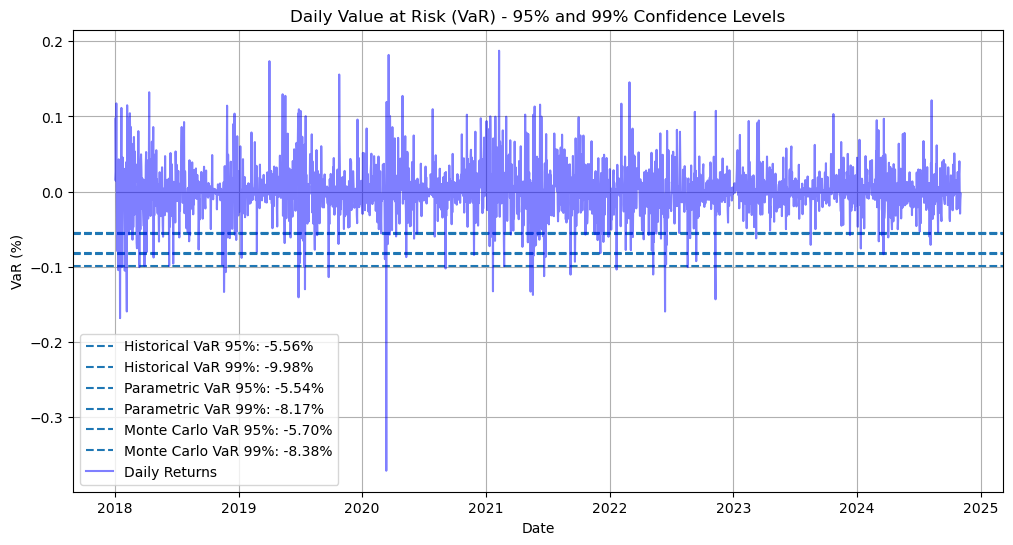


30-Day Holding Period VaR (as percentage):
Historical VaR at 95% (30 Days): -30.45%
Historical VaR at 99% (30 Days): -54.64%
Parametric VaR at 95% (30 Days): -30.36%
Parametric VaR at 99% (30 Days): -44.75%
Monte Carlo VaR at 95% (30 Days): -31.22%
Monte Carlo VaR at 99% (30 Days): -45.91%


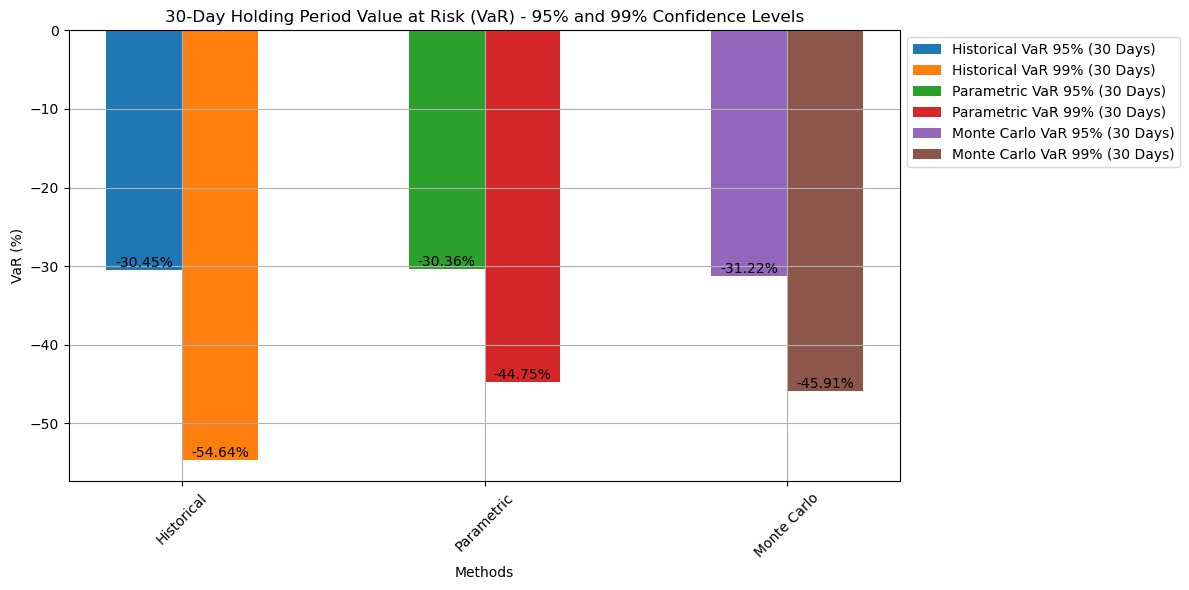


Information Ratio: -0.0000

Expected Shortfall (as percentage):
Expected Shortfall at 95% Confidence: -8.25%
Expected Shortfall at 99% Confidence: -13.15%


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime

# Download Bitcoin data
start_date = "2018-01-01"
end_date = datetime.today().strftime('%Y-%m-%d')
bitcoin_data = yf.download("BTC-USD", start=start_date, end=end_date)

# Calculate daily returns
bitcoin_data['Returns'] = bitcoin_data['Close'].pct_change().dropna()

# Set VaR confidence levels
confidence_levels = [0.95, 0.99]

# Initialize dictionary to store VaR values
var_results = {}

# 1. Running and Plotting Daily VaR (95% and 99%) for 3 Methods

# Historical VaR
var_results['Historical'] = {cl: np.percentile(bitcoin_data['Returns'].dropna(), (1 - cl) * 100) for cl in confidence_levels}

# Parametric VaR (using mean and standard deviation, assumes normal distribution)
mean_return = bitcoin_data['Returns'].mean()
std_return = bitcoin_data['Returns'].std()
var_results['Parametric'] = {cl: mean_return + std_return * np.percentile(np.random.randn(10000), (1 - cl) * 100) for cl in confidence_levels}

# Monte Carlo VaR (simulate returns based on normal distribution)
simulated_returns = np.random.normal(mean_return, std_return, 10000)
var_results['Monte Carlo'] = {cl: np.percentile(simulated_returns, (1 - cl) * 100) for cl in confidence_levels}

# Convert VaR values to percentages and print them
print("Daily VaR (as percentage):")
for method, vars in var_results.items():
    for cl, var_value in vars.items():
        print(f"{method} VaR at {int(cl * 100)}%: {var_value * 100:.2f}%")

# Plotting daily VaR for 95% and 99% confidence levels
plt.figure(figsize=(12, 6))
for method, vars in var_results.items():
    for cl, var_value in vars.items():
        plt.axhline(y=var_value, linestyle='--', label=f'{method} VaR {int(cl * 100)}%: {var_value * 100:.2f}%')
plt.plot(bitcoin_data['Returns'], color='blue', alpha=0.5, label='Daily Returns')
plt.legend()
plt.title("Daily Value at Risk (VaR) - 95% and 99% Confidence Levels")
plt.xlabel("Date")
plt.ylabel("VaR (%)")
plt.grid()
plt.show()

# 2. Plotting 30-Day Holding Period VaR (95% and 99%)
holding_period = 30
var_30_days = {method: {cl: var * np.sqrt(holding_period) * 100 for cl, var in vars.items()} for method, vars in var_results.items()}  # Convert to percentage

# Print 30-day holding period VaR values
print("\n30-Day Holding Period VaR (as percentage):")
for method, vars in var_30_days.items():
    for cl, var_value in vars.items():
        print(f"{method} VaR at {int(cl * 100)}% (30 Days): {var_value:.2f}%")

# Plotting 30-day VaR for 95% and 99% confidence levels
plt.figure(figsize=(12, 6))
bar_width = 0.25
positions = np.arange(len(var_30_days))

# Plot bars for each method and confidence level
for i, (method, vars) in enumerate(var_30_days.items()):
    for j, (cl, var_value) in enumerate(vars.items()):
        plt.bar(positions[i] + j * bar_width, var_value, bar_width, label=f"{method} VaR {int(cl * 100)}% (30 Days)")
        plt.text(positions[i] + j * bar_width, var_value, f"{var_value:.2f}%", ha='center', va='bottom', fontsize=10)

# Adjust ticks and legend to prevent overlapping
plt.xticks(positions + bar_width * (len(confidence_levels) - 1) / 2, list(var_30_days.keys()), rotation=45)
plt.title("30-Day Holding Period Value at Risk (VaR) - 95% and 99% Confidence Levels")
plt.xlabel("Methods")
plt.ylabel("VaR (%)")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid()
plt.tight_layout()
plt.show()

# 3. Calculate Information Ratio
# Information Ratio = (Mean Excess Return) / (Tracking Error)
benchmark_return = bitcoin_data['Returns'].mean()  # Here we use mean return as a proxy for benchmark return
excess_return = bitcoin_data['Returns'] - benchmark_return
information_ratio = excess_return.mean() / excess_return.std()

# Print Information Ratio
print(f"\nInformation Ratio: {information_ratio:.4f}")

# 4. Calculate Expected Shortfall (ES)
# Expected Shortfall for 95% and 99%
expected_shortfall = {cl: bitcoin_data['Returns'][bitcoin_data['Returns'] <= var_results['Historical'][cl]].mean() * 100 for cl in confidence_levels}  # Convert to percentage

# Print Expected Shortfall results
print("\nExpected Shortfall (as percentage):")
for cl, es in expected_shortfall.items():
    print(f"Expected Shortfall at {int(cl * 100)}% Confidence: {es:.2f}%")


[*********************100%%**********************]  1 of 1 completed


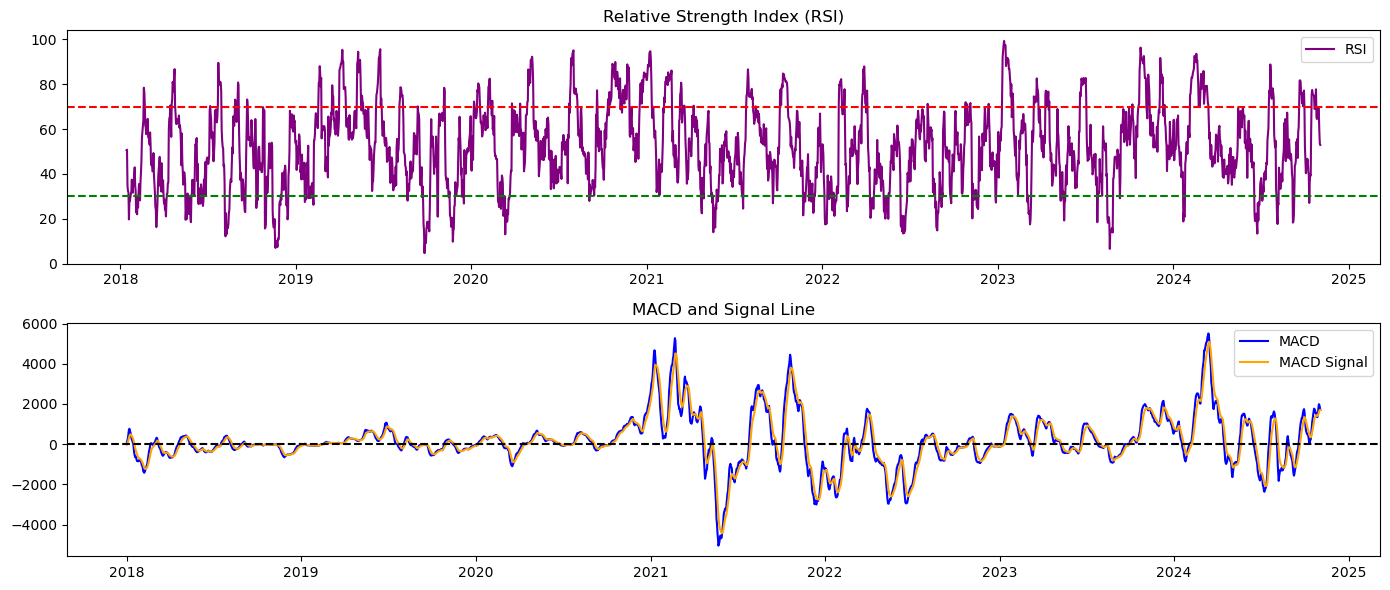

Average Greed (Positive Return Days): 2.43%
Average Fear (Negative Return Days): -2.30%


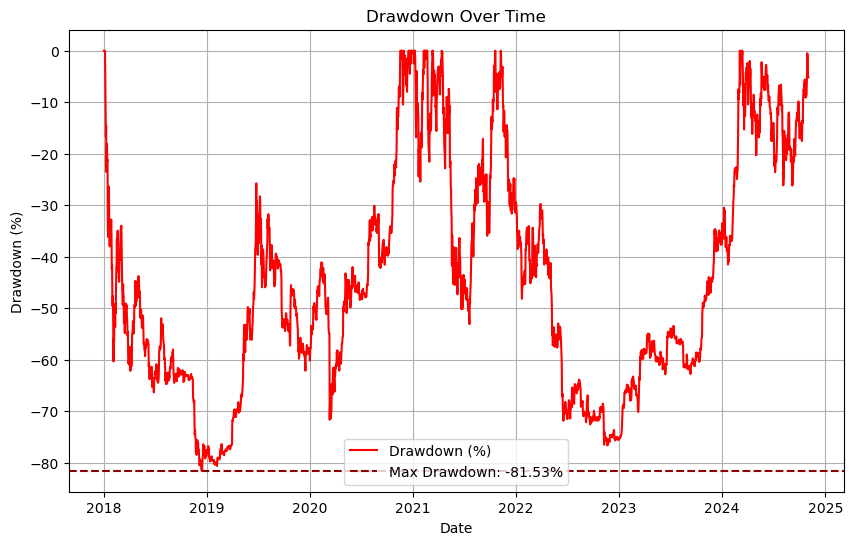

Maximum Drawdown: -81.53%
Time to Recovery (Days): 1
Best Bid: $67615.65
Best Ask: $67615.66
Bid-Ask Spread: $0.01 (0.00%)
Market Depth (Top 10 levels): 8.67 BTC


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime
from binance.client import Client

# Binance API setup (replace with your own API keys)
API_KEY = 'YOUR_API_KEY'
API_SECRET = 'YOUR_API_SECRET'
client = Client(API_KEY, API_SECRET)

# Download Bitcoin data
start_date = "2018-01-01"
end_date = datetime.today().strftime('%Y-%m-%d')
bitcoin_data = yf.download("BTC-USD", start=start_date, end=end_date)

# Calculate daily returns
bitcoin_data['Returns'] = bitcoin_data['Close'].pct_change().dropna()

# 1. Complex Market and Sentiment Metrics

# Relative Strength Index (RSI)
window_length = 14
delta = bitcoin_data['Close'].diff(1)
gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)
avg_gain = gain.rolling(window=window_length).mean()
avg_loss = loss.rolling(window=window_length).mean()
rs = avg_gain / avg_loss
bitcoin_data['RSI'] = 100 - (100 / (1 + rs))

# Moving Average Convergence Divergence (MACD)
exp12 = bitcoin_data['Close'].ewm(span=12, adjust=False).mean()
exp26 = bitcoin_data['Close'].ewm(span=26, adjust=False).mean()
bitcoin_data['MACD'] = exp12 - exp26
bitcoin_data['MACD_Signal'] = bitcoin_data['MACD'].ewm(span=9, adjust=False).mean()

# Plot RSI and MACD
plt.figure(figsize=(14, 6))
plt.subplot(2, 1, 1)
plt.plot(bitcoin_data['RSI'], color='purple', label='RSI')
plt.axhline(70, color='red', linestyle='--')
plt.axhline(30, color='green', linestyle='--')
plt.title("Relative Strength Index (RSI)")
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(bitcoin_data['MACD'], label='MACD', color='blue')
plt.plot(bitcoin_data['MACD_Signal'], label='MACD Signal', color='orange')
plt.axhline(0, color='black', linestyle='--')
plt.title("MACD and Signal Line")
plt.legend()
plt.tight_layout()
plt.show()

# Proxy for Fear & Greed Index: Positive return average for greed, negative return average for fear
average_greed = bitcoin_data[bitcoin_data['Returns'] > 0]['Returns'].mean() * 100
average_fear = bitcoin_data[bitcoin_data['Returns'] < 0]['Returns'].mean() * 100

# Print Fear and Greed metrics
print(f"Average Greed (Positive Return Days): {average_greed:.2f}%")
print(f"Average Fear (Negative Return Days): {average_fear:.2f}%")

# 2. Drawdown and Recovery Metrics

# Calculate cumulative returns
cumulative_returns = (1 + bitcoin_data['Returns']).cumprod()
rolling_max = cumulative_returns.cummax()
drawdown = (cumulative_returns - rolling_max) / rolling_max
bitcoin_data['Drawdown'] = drawdown

# Calculate Maximum Drawdown
max_drawdown = drawdown.min()

# Calculate Time to Recovery
recovery_days = drawdown.groupby((drawdown == 0).cumsum()).transform('max')
time_to_recovery = (recovery_days != 0).sum()

# Plot Drawdown
plt.figure(figsize=(10, 6))
plt.plot(drawdown * 100, color='red', label='Drawdown (%)')
plt.axhline(y=max_drawdown * 100, color='darkred', linestyle='--', label=f'Max Drawdown: {max_drawdown * 100:.2f}%')
plt.title("Drawdown Over Time")
plt.xlabel("Date")
plt.ylabel("Drawdown (%)")
plt.legend()
plt.grid()
plt.show()

# Print Drawdown Metrics
print(f"Maximum Drawdown: {max_drawdown * 100:.2f}%")
print(f"Time to Recovery (Days): {time_to_recovery}")

# 3. Liquidity Risk Metrics from Binance API

# Fetch order book depth for BTC/USDT pair on Binance
order_book = client.get_order_book(symbol="BTCUSDT", limit=10)
bids = order_book['bids']
asks = order_book['asks']

# Calculate bid-ask spread
best_bid = float(bids[0][0])
best_ask = float(asks[0][0])
bid_ask_spread = best_ask - best_bid
spread_percentage = (bid_ask_spread / ((best_bid + best_ask) / 2)) * 100

# Calculate market depth (sum of top 10 bid and ask volumes)
total_bid_volume = sum(float(bid[1]) for bid in bids)
total_ask_volume = sum(float(ask[1]) for ask in asks)
market_depth = total_bid_volume + total_ask_volume

# Print Liquidity Metrics
print(f"Best Bid: ${best_bid}")
print(f"Best Ask: ${best_ask}")
print(f"Bid-Ask Spread: ${bid_ask_spread:.2f} ({spread_percentage:.2f}%)")
print(f"Market Depth (Top 10 levels): {market_depth:.2f} BTC")


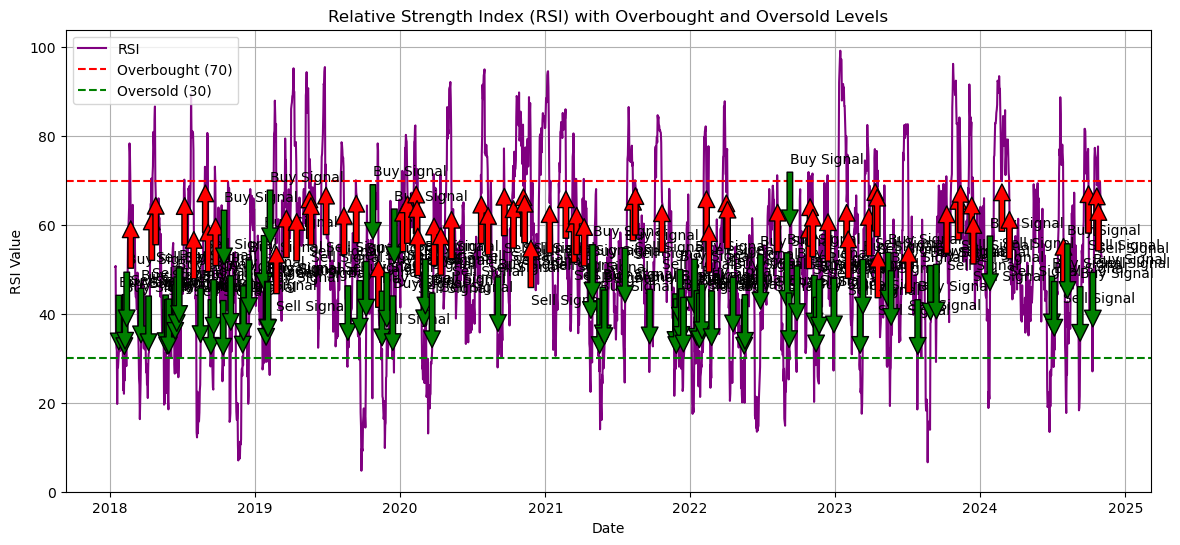

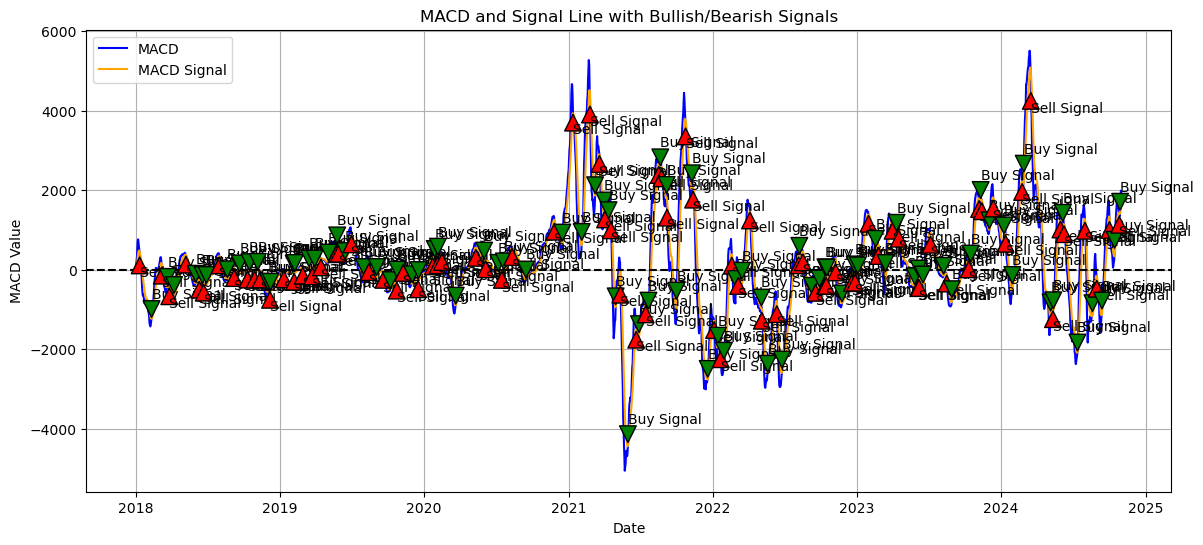

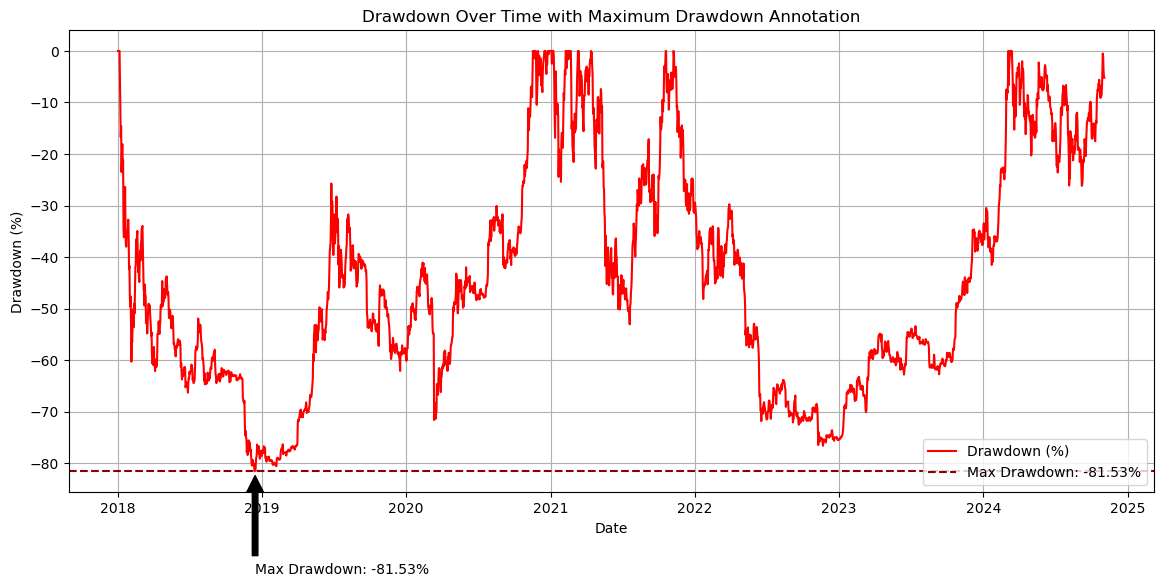

In [7]:
import matplotlib.pyplot as plt

# 1. Plot RSI with Annotations for Overbought/Oversold
plt.figure(figsize=(14, 6))
plt.plot(bitcoin_data['RSI'], color='purple', label='RSI')
plt.axhline(70, color='red', linestyle='--', label='Overbought (70)')
plt.axhline(30, color='green', linestyle='--', label='Oversold (30)')
plt.title("Relative Strength Index (RSI) with Overbought and Oversold Levels")
plt.legend()
plt.xlabel("Date")
plt.ylabel("RSI Value")
plt.grid()

# Annotate RSI overbought and oversold signals
for i in range(1, len(bitcoin_data)):
    if bitcoin_data['RSI'].iloc[i-1] < 30 <= bitcoin_data['RSI'].iloc[i]:
        plt.annotate('Buy Signal', xy=(bitcoin_data.index[i], bitcoin_data['RSI'].iloc[i]),
                     xytext=(bitcoin_data.index[i], bitcoin_data['RSI'].iloc[i]+15),
                     arrowprops=dict(facecolor='green', shrink=0.05))
    elif bitcoin_data['RSI'].iloc[i-1] > 70 >= bitcoin_data['RSI'].iloc[i]:
        plt.annotate('Sell Signal', xy=(bitcoin_data.index[i], bitcoin_data['RSI'].iloc[i]),
                     xytext=(bitcoin_data.index[i], bitcoin_data['RSI'].iloc[i]-15),
                     arrowprops=dict(facecolor='red', shrink=0.05))
plt.show()

# 2. Plot MACD with Buy/Sell Signal Annotations
plt.figure(figsize=(14, 6))
plt.plot(bitcoin_data['MACD'], label='MACD', color='blue')
plt.plot(bitcoin_data['MACD_Signal'], label='MACD Signal', color='orange')
plt.axhline(0, color='black', linestyle='--')
plt.title("MACD and Signal Line with Bullish/Bearish Signals")
plt.legend()
plt.xlabel("Date")
plt.ylabel("MACD Value")
plt.grid()

# Annotate MACD buy and sell signals
for i in range(1, len(bitcoin_data)):
    if bitcoin_data['MACD'].iloc[i-1] < bitcoin_data['MACD_Signal'].iloc[i-1] and \
       bitcoin_data['MACD'].iloc[i] > bitcoin_data['MACD_Signal'].iloc[i]:
        plt.annotate('Buy Signal', xy=(bitcoin_data.index[i], bitcoin_data['MACD'].iloc[i]),
                     xytext=(bitcoin_data.index[i], bitcoin_data['MACD'].iloc[i]+500),
                     arrowprops=dict(facecolor='green', shrink=0.05))
    elif bitcoin_data['MACD'].iloc[i-1] > bitcoin_data['MACD_Signal'].iloc[i-1] and \
         bitcoin_data['MACD'].iloc[i] < bitcoin_data['MACD_Signal'].iloc[i]:
        plt.annotate('Sell Signal', xy=(bitcoin_data.index[i], bitcoin_data['MACD'].iloc[i]),
                     xytext=(bitcoin_data.index[i], bitcoin_data['MACD'].iloc[i]-500),
                     arrowprops=dict(facecolor='red', shrink=0.05))
plt.show()

# 3. Plot Drawdown with Max Drawdown Annotation
plt.figure(figsize=(14, 6))
plt.plot(drawdown * 100, color='red', label='Drawdown (%)')
plt.axhline(y=max_drawdown * 100, color='darkred', linestyle='--', label=f'Max Drawdown: {max_drawdown * 100:.2f}%')
plt.title("Drawdown Over Time with Maximum Drawdown Annotation")
plt.xlabel("Date")
plt.ylabel("Drawdown (%)")
plt.legend()
plt.grid()

# Annotate Max Drawdown
plt.annotate(f'Max Drawdown: {max_drawdown * 100:.2f}%', xy=(drawdown.idxmin(), max_drawdown * 100),
             xytext=(drawdown.idxmin(), max_drawdown * 100 - 20),
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.show()
